In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connection = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


C:\Users\oconn\AppData\Local\Temp\ipykernel_4440\1526636886.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
connection = engine.connect()

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
dates = connection.execute(text("SELECT MAX(date) FROM measurement")).fetchall()
for date in dates:
    print('The most recent date in the dataset is: ', date)


The most recent date in the dataset is:  ('2017-08-23',)


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-03-12'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2017-01-09'),
  Text(1000.0, 0, '2017-08-14'),
  Text(1500.0, 0, '2017-07-21'),
  Text(2000.0, 0, '2016-12-24'),
  Text(2500.0, 0, '')])

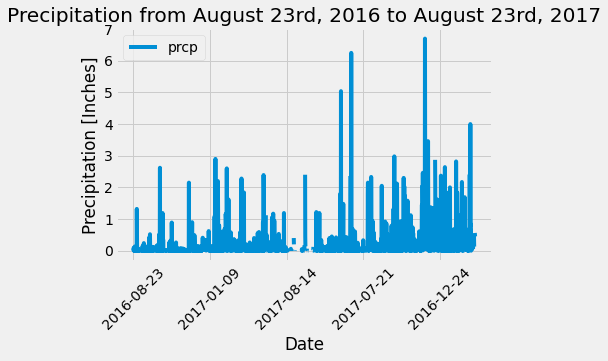

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
prev_tweleve = connection.execute(text("SELECT date, prcp FROM measurement WHERE date <= '2017-08-23' AND date >= '2016-08-23' ")).fetchall()
# print('The following are the previous 12 months of precipitation data')
# for date in prev_tweleve:
#     print(date)


# Save the query results as a Pandas DataFrame. Explicitly set the column names
prev_tweleve_df = pd.read_sql(text("SELECT date, prcp FROM measurement WHERE date <= '2017-08-23' AND date >= '2016-08-23' "), connection)
# get rid of nans
prev_tweleve_df.dropna()


# Sort the dataframe by date
prev_tweleve_df.sort_values(by='date')


# Use Pandas Plotting with Matplotlib to plot the data
prev_tweleve_df.plot('date', 'prcp')
plt.title('Precipitation from August 23rd, 2016 to August 23rd, 2017')
plt.ylabel('Precipitation [Inches]')
plt.xlabel('Date')
plt.xticks(rotation=45)


In [45]:
# Use Pandas to calculate the summary statistics for the precipitation data
prev_tweleve_df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number of stations in the dataset
total_stations = connection.execute(text("SELECT COUNT(station) FROM station ")).fetchall()
for s in total_stations:
    print(s)



(9,)


In [54]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = connection.execute(text("SELECT m.station, COUNT(m.station) as scount FROM measurement AS m GROUP BY m.station ORDER BY scount DESC")).fetchall()

for sa in active_stations:
    print(sa)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_temps = connection.execute(text("SELECT m.station, MIN(tobs), MAX(tobs), AVG(tobs) FROM measurement AS m WHERE m.station LIKE 'USC00519281' ")).fetchall()

for mast in most_active_station_temps:
    print(mast)


('USC00519281', 54.0, 85.0, 71.66378066378067)


Text(0.5, 0, 'Temperature [Fahrenheit]')

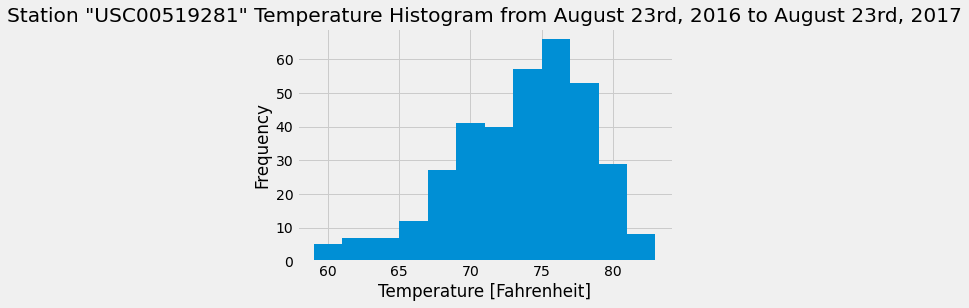

In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prev_tweleve_most_active_station_temps = connection.execute(text("SELECT m.station, m.date, m.tobs FROM measurement AS m WHERE m.station LIKE 'USC00519281' AND (m.date <= '2017-08-23' AND m.date >= '2016-08-23') ")).fetchall()

# convert to df 
prev_tweleve_most_active_station_temps_df = pd.read_sql(text("SELECT m.station, m.date, m.tobs FROM measurement AS m WHERE m.station LIKE 'USC00519281' AND (m.date <= '2017-08-23' AND m.date >= '2016-08-23') "), connection)
# get rid of nans
prev_tweleve_most_active_station_temps_df.dropna()

prev_tweleve_most_active_station_temps_df["tobs"].hist(bins=12) # 12 bins because theres 12 months
plt.title('Station "USC00519281" Temperature Histogram from August 23rd, 2016 to August 23rd, 2017')
plt.ylabel('Frequency')
plt.xlabel('Temperature [Fahrenheit]')



# Close Session

In [66]:
# Close Session
session.close()